In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
import category_encoders as ce
import warnings
from sklearn.preprocessing import RobustScaler

warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("credit_card_fraud_det.csv", index_col=0)

df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44+00:00,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21 00:00:00+00:00,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51+00:00,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19 00:00:00+00:00,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27+00:00,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21 00:00:00+00:00,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03+00:00,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30 00:00:00+00:00,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32+00:00,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02 00:00:00+00:00,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56+00:00,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09 00:00:00+00:00,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04+00:00,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20 00:00:00+00:00,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07+00:00,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13 00:00:00+00:00,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15+00:00,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29 00:00:00+00:00,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


### 資料描述

In [32]:
df['is_fraud'].value_counts()

is_fraud
0    337825
1      1782
Name: count, dtype: int64

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


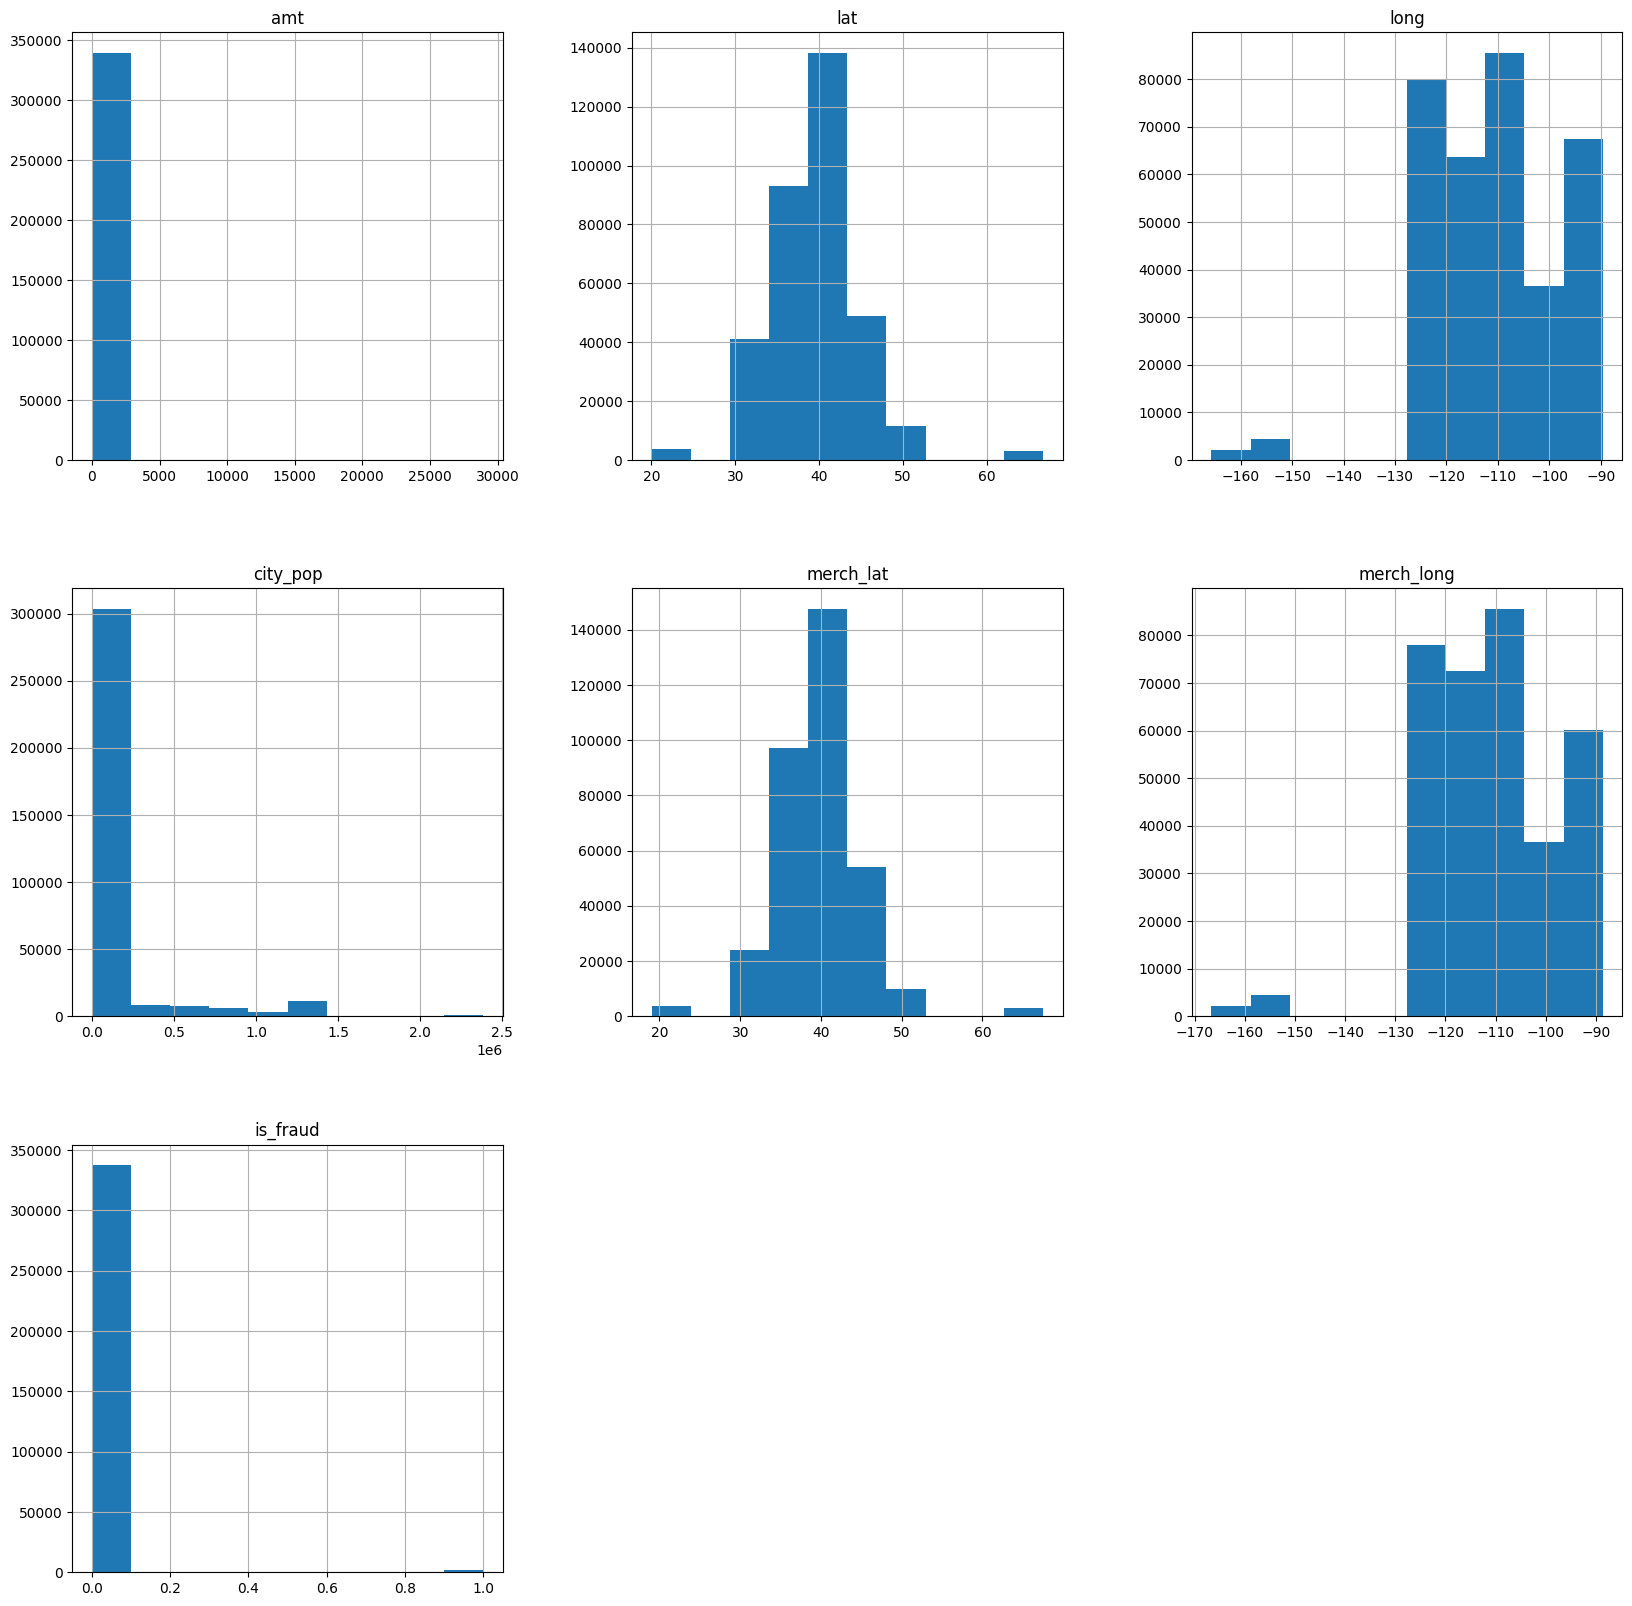

In [ ]:
##amt,city_pop有嚴重的離群值
df.hist(figsize = (20, 20))
plt.show()

### 距離資料處理

In [7]:
## 算距離工具
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # 地球半徑 (公里)
    R = 6371.0

    # 角度轉弧度
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine 公式
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance


In [8]:
df['distance_km'] = df.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)

df['distance_km'].describe()

count    339607.000000
mean         75.577644
std          29.054393
min           0.205072
25%          54.734118
50%          77.612616
75%          97.947789
max         152.117173
Name: distance_km, dtype: float64

In [9]:
##境外消費與否1代表境外,0代表境內消費

def is_overseas(lat, lon):
    # 美國本土邊界範圍
    lat_min, lat_max = 24.5, 49.5
    lon_min, lon_max = -125, -66.5

    # 檢查是否在邊界內
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        return 0  # 在美國國土內
    else:
        return 1

In [10]:
df['overseas_purchase'] = df.apply(lambda row: is_overseas(row['lat'], row['long']), axis=1)
df['overseas_purchase'].value_counts()

overseas_purchase
0    332995
1      6612
Name: count, dtype: int64

In [11]:
df.drop(columns=['lat','long','merch_lat','merch_long','trans_num'],inplace=True)

### 時間資料處理

In [12]:
#字串格式轉datetime
df["dob"] = pd.to_datetime(df['dob'])
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [13]:
##刷卡年齡
df['age'] = round((df["trans_date_trans_time"] - df["dob"]).dt.days / 365.25,0).astype(int)
df.drop(columns=['dob'],inplace=True)
df['age'].describe()

count    339607.000000
mean         47.796482
std          17.024251
min          17.000000
25%          34.000000
50%          46.000000
75%          58.000000
max          93.000000
Name: age, dtype: float64

In [14]:
# 提取時間特徵
df['trans_day_hour'] = df['trans_date_trans_time'].dt.hour       # 幾點交易
df['trans_week_day'] = df['trans_date_trans_time'].dt.dayofweek+1   # 星期幾
df['trans_month'] = df['trans_date_trans_time'].dt.month     # 幾月
df['trans_day'] = df['trans_date_trans_time'].dt.day         # 幾號

df.drop(columns=['trans_date_trans_time'],inplace=True)

In [15]:
df.dtypes

merchant              object
category              object
amt                  float64
city                  object
state                 object
city_pop               int64
job                   object
is_fraud               int64
distance_km          float64
overseas_purchase      int64
age                    int32
trans_day_hour         int32
trans_week_day         int32
trans_month            int32
trans_day              int32
dtype: object

### 類別轉數值

In [ ]:
TARGET_COL = 'is_fraud'

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n類別欄位進行 K-Fold Encoding: {categorical_cols}")

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]


找到的類別欄位 (將進行 K-Fold Encoding): ['merchant', 'category', 'city', 'state', 'job']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    random_state=42,    
    stratify=y          
)

print(f"\n訓練集維度: {X_train.shape}")
print(f"測試集維度: {X_test.shape}")



訓練集維度: (271685, 14)
測試集維度: (67922, 14)


In [ ]:
##target_encodng
def kfold_ce_target_encoding(X_train, y_train, X_test, categorical_cols, n_splits=5, random_state=42, smoothing=10):
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for col in categorical_cols:
        encoded_col_name = f"{col}_kfold_encoded"
        X_train_encoded[encoded_col_name] = np.nan
        X_test_encoded[encoded_col_name] = 0  

        for train_idx, val_idx in skf.split(X_train, y_train):
            X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
            X_val_fold = X_train.iloc[val_idx]

            encoder = ce.TargetEncoder(cols=[col], smoothing=smoothing)
            encoder.fit(X_train_fold[[col]], y_train_fold)

            X_train_encoded.iloc[val_idx, X_train_encoded.columns.get_loc(encoded_col_name)] = encoder.transform(X_val_fold[[col]]).values.ravel()

        
        encoder = ce.TargetEncoder(cols=[col], smoothing=smoothing)
        encoder.fit(X_train[[col]], y_train)
        X_test_encoded[encoded_col_name] = encoder.transform(X_test[[col]]).values.ravel()
    
    X_train_encoded = X_train_encoded.drop(columns=categorical_cols)
    X_test_encoded = X_test_encoded.drop(columns=categorical_cols)

    return X_train_encoded, X_test_encoded

In [19]:
X_train_encoded, X_test_encoded = kfold_ce_target_encoding(X_train, y_train, X_test, categorical_cols)

In [20]:
X_train_encoded

,amt,city_pop,distance_km,overseas_purchase,age,trans_day_hour,trans_week_day,trans_month,trans_day,merchant_kfold_encoded,category_kfold_encoded,city_kfold_encoded,state_kfold_encoded,job_kfold_encoded
179685,24.79,1745,110.765620,0,46,13,6,2,1,8.450704e-03,0.001895,0.001078,0.006526,0.001078
138301,12.40,1745,49.886058,0,46,21,7,11,17,3.355705e-03,0.002589,0.001078,0.006526,0.001078
200559,108.34,258,20.858073,0,58,10,1,3,30,1.030928e-02,0.012979,0.002152,0.003877,0.003561
39697,179.56,4677,98.419776,0,64,6,6,4,20,4.845084e-11,0.012903,0.006598,0.004978,0.006598
84427,9.17,1139,41.912843,0,69,5,1,7,22,3.028048e-17,0.014943,0.006427,0.004978,0.006427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320617,17.78,54287,71.528148,0,48,18,2,12,8,3.647416e-02,0.014946,0.000710,0.004995,0.000710
142567,83.24,545147,34.575845,0,32,9,4,11,28,9.706468e-09,0.002068,0.004384,0.004462,0.004384
283788,4.13,467,38.617673,0,70,5,1,9,21,4.464286e-03,0.013063,0.001459,0.004662,0.001459
125541,53.80,525713,76.002214,0,27,17,5,10,18,1.165656e-17,0.001945,0.003636,0.005711,0.003636


In [21]:
X_test_encoded

,amt,city_pop,distance_km,overseas_purchase,age,trans_day_hour,trans_week_day,trans_month,trans_day,merchant_kfold_encoded,category_kfold_encoded,city_kfold_encoded,state_kfold_encoded,job_kfold_encoded
50883,237.12,1252,125.659147,0,82,8,5,5,17,1.600000e-02,0.013299,0.010161,0.007528,0.010161
148234,72.97,832,113.576830,0,33,23,4,12,5,1.165451e-18,0.001567,0.004687,0.004943,0.004687
190126,7.70,732,82.472305,0,63,5,4,3,5,3.067485e-03,0.002980,0.011935,0.006278,0.011935
188267,80.15,1789,73.642493,0,38,3,7,3,1,1.478743e-02,0.013095,0.003707,0.006278,0.003177
159797,61.12,3684,94.668404,0,38,22,4,12,19,2.457002e-03,0.002438,0.001741,0.004623,0.001741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332738,94.55,1302,86.196254,0,44,2,3,12,23,2.650602e-02,0.014710,0.004063,0.007528,0.004829
154568,26.84,1490,38.393492,1,29,19,5,12,13,1.972387e-03,0.001938,0.003466,0.004798,0.003466
165663,60.71,805,95.257924,0,50,5,5,12,27,0.000000e+00,0.004143,0.015025,0.004680,0.015025
228283,38.47,14871,39.836709,0,46,15,2,6,2,9.925558e-03,0.014710,0.003000,0.004623,0.003000


In [22]:
##檢查是否有任何 NaN 值:
print("X_train_encoded NaN 數量:", X_train_encoded.isnull().sum().sum())
print("X_test_encoded NaN 數量:", X_test_encoded.isnull().sum().sum())

X_train_encoded NaN 數量: 0
X_test_encoded NaN 數量: 0


In [23]:
X_train_encoded.describe()

,amt,city_pop,distance_km,overseas_purchase,age,trans_day_hour,trans_week_day,trans_month,trans_day,merchant_kfold_encoded,category_kfold_encoded,city_kfold_encoded,state_kfold_encoded,job_kfold_encoded
count,271685.000000,2.716850e+05,271685.000000,271685.000000,271685.000000,271685.000000,271685.000000,271685.000000,271685.000000,2.716850e+05,271685.000000,271685.000000,271685.000000,271685.000000
mean,70.715613,1.075047e+05,75.580691,0.019567,47.817958,12.811690,3.961209,7.158500,15.859532,5.247051e-03,0.005249,0.004900,0.005248,0.004917
std,158.413544,2.936614e+05,29.055158,0.138506,17.031665,6.812981,2.190469,3.425476,8.865882,6.198783e-03,0.004737,0.006009,0.001383,0.005470
min,1.000000,4.600000e+01,0.205072,0.000000,17.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.001296,0.000000,0.003551,0.000000
25%,9.610000,4.930000e+02,54.757108,0.000000,35.000000,7.000000,2.000000,4.000000,8.000000,2.195862e-14,0.001742,0.002505,0.004593,0.002570
50%,46.590000,1.661000e+03,77.598490,0.000000,46.000000,14.000000,4.000000,7.000000,16.000000,3.225806e-03,0.002798,0.003871,0.004867,0.004172
75%,83.370000,3.570500e+04,97.955816,0.000000,58.000000,19.000000,6.000000,10.000000,24.000000,7.792208e-03,0.006298,0.005839,0.005589,0.005968
max,16837.080000,2.383912e+06,152.117173,1.000000,93.000000,23.000000,7.000000,12.000000,31.000000,4.216867e-02,0.015027,0.335320,0.018431,0.313648


In [24]:
X_test_encoded.describe()

,amt,city_pop,distance_km,overseas_purchase,age,trans_day_hour,trans_week_day,trans_month,trans_day,merchant_kfold_encoded,category_kfold_encoded,city_kfold_encoded,state_kfold_encoded,job_kfold_encoded
count,67922.000000,6.792200e+04,67922.000000,67922.000000,67922.000000,67922.000000,67922.000000,67922.000000,67922.000000,6.792200e+04,67922.000000,67922.000000,67922.000000,67922.000000
mean,70.027474,1.056856e+05,75.565455,0.019081,47.710580,12.825638,3.946497,7.155487,15.815111,5.244704e-03,0.005236,0.004941,0.005242,0.004954
std,174.112094,2.904877e+05,29.051546,0.136810,16.994419,6.808399,2.195994,3.418036,8.902135,5.964438e-03,0.004721,0.007532,0.001333,0.006766
min,1.000000,4.600000e+01,0.477637,0.000000,17.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.001494,0.000000,0.004012,0.000000
25%,9.580000,4.710000e+02,54.655050,0.000000,34.000000,7.000000,2.000000,4.000000,8.000000,2.933162e-10,0.001938,0.002552,0.004623,0.002720
50%,45.900000,1.645000e+03,77.678930,0.000000,46.000000,14.000000,4.000000,7.000000,16.000000,3.021148e-03,0.002682,0.003995,0.004943,0.003995
75%,83.257500,3.543900e+04,97.912200,0.000000,58.000000,19.000000,6.000000,10.000000,23.000000,7.662835e-03,0.006092,0.005902,0.005327,0.005818
max,28948.900000,2.383912e+06,150.922504,1.000000,93.000000,23.000000,7.000000,12.000000,31.000000,3.658537e-02,0.014710,0.380808,0.015847,0.335319


In [25]:
##正規化
rob_scaler = RobustScaler()
cols_to_scale=['amt','city_pop','distance_km','age','trans_day','trans_month','trans_day_hour','trans_week_day']
X_train_encoded[cols_to_scale]=rob_scaler.fit_transform(X_train_encoded[cols_to_scale])
X_test_encoded[cols_to_scale]=rob_scaler.transform(X_test_encoded[cols_to_scale])


In [26]:
X_train_encoded.describe()

,amt,city_pop,distance_km,overseas_purchase,age,trans_day_hour,trans_week_day,trans_month,trans_day,merchant_kfold_encoded,category_kfold_encoded,city_kfold_encoded,state_kfold_encoded,job_kfold_encoded
count,271685.000000,271685.000000,271685.000000,271685.000000,271685.000000,271685.000000,271685.000000,271685.000000,271685.000000,2.716850e+05,271685.000000,271685.000000,271685.000000,271685.000000
mean,0.327083,3.005898,-0.046710,0.019567,0.079042,-0.099026,-0.009698,0.026417,-0.008779,5.247051e-03,0.005249,0.004900,0.005248,0.004917
std,2.147689,8.339811,0.672593,0.138506,0.740507,0.567748,0.547617,0.570913,0.554118,6.198783e-03,0.004737,0.006009,0.001383,0.005470
min,-0.618086,-0.045865,-1.791568,0.000000,-1.260870,-1.166667,-0.750000,-1.000000,-0.937500,0.000000e+00,0.001296,0.000000,0.003551,0.000000
25%,-0.501356,-0.033171,-0.528752,0.000000,-0.478261,-0.583333,-0.500000,-0.500000,-0.500000,2.195862e-14,0.001742,0.002505,0.004593,0.002570
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.225806e-03,0.002798,0.003871,0.004867,0.004172
75%,0.498644,0.966829,0.471248,0.000000,0.521739,0.416667,0.500000,0.500000,0.500000,7.792208e-03,0.006298,0.005839,0.005589,0.005968
max,227.636795,67.654521,1.725021,1.000000,2.043478,0.750000,0.750000,0.833333,0.937500,4.216867e-02,0.015027,0.335320,0.018431,0.313648


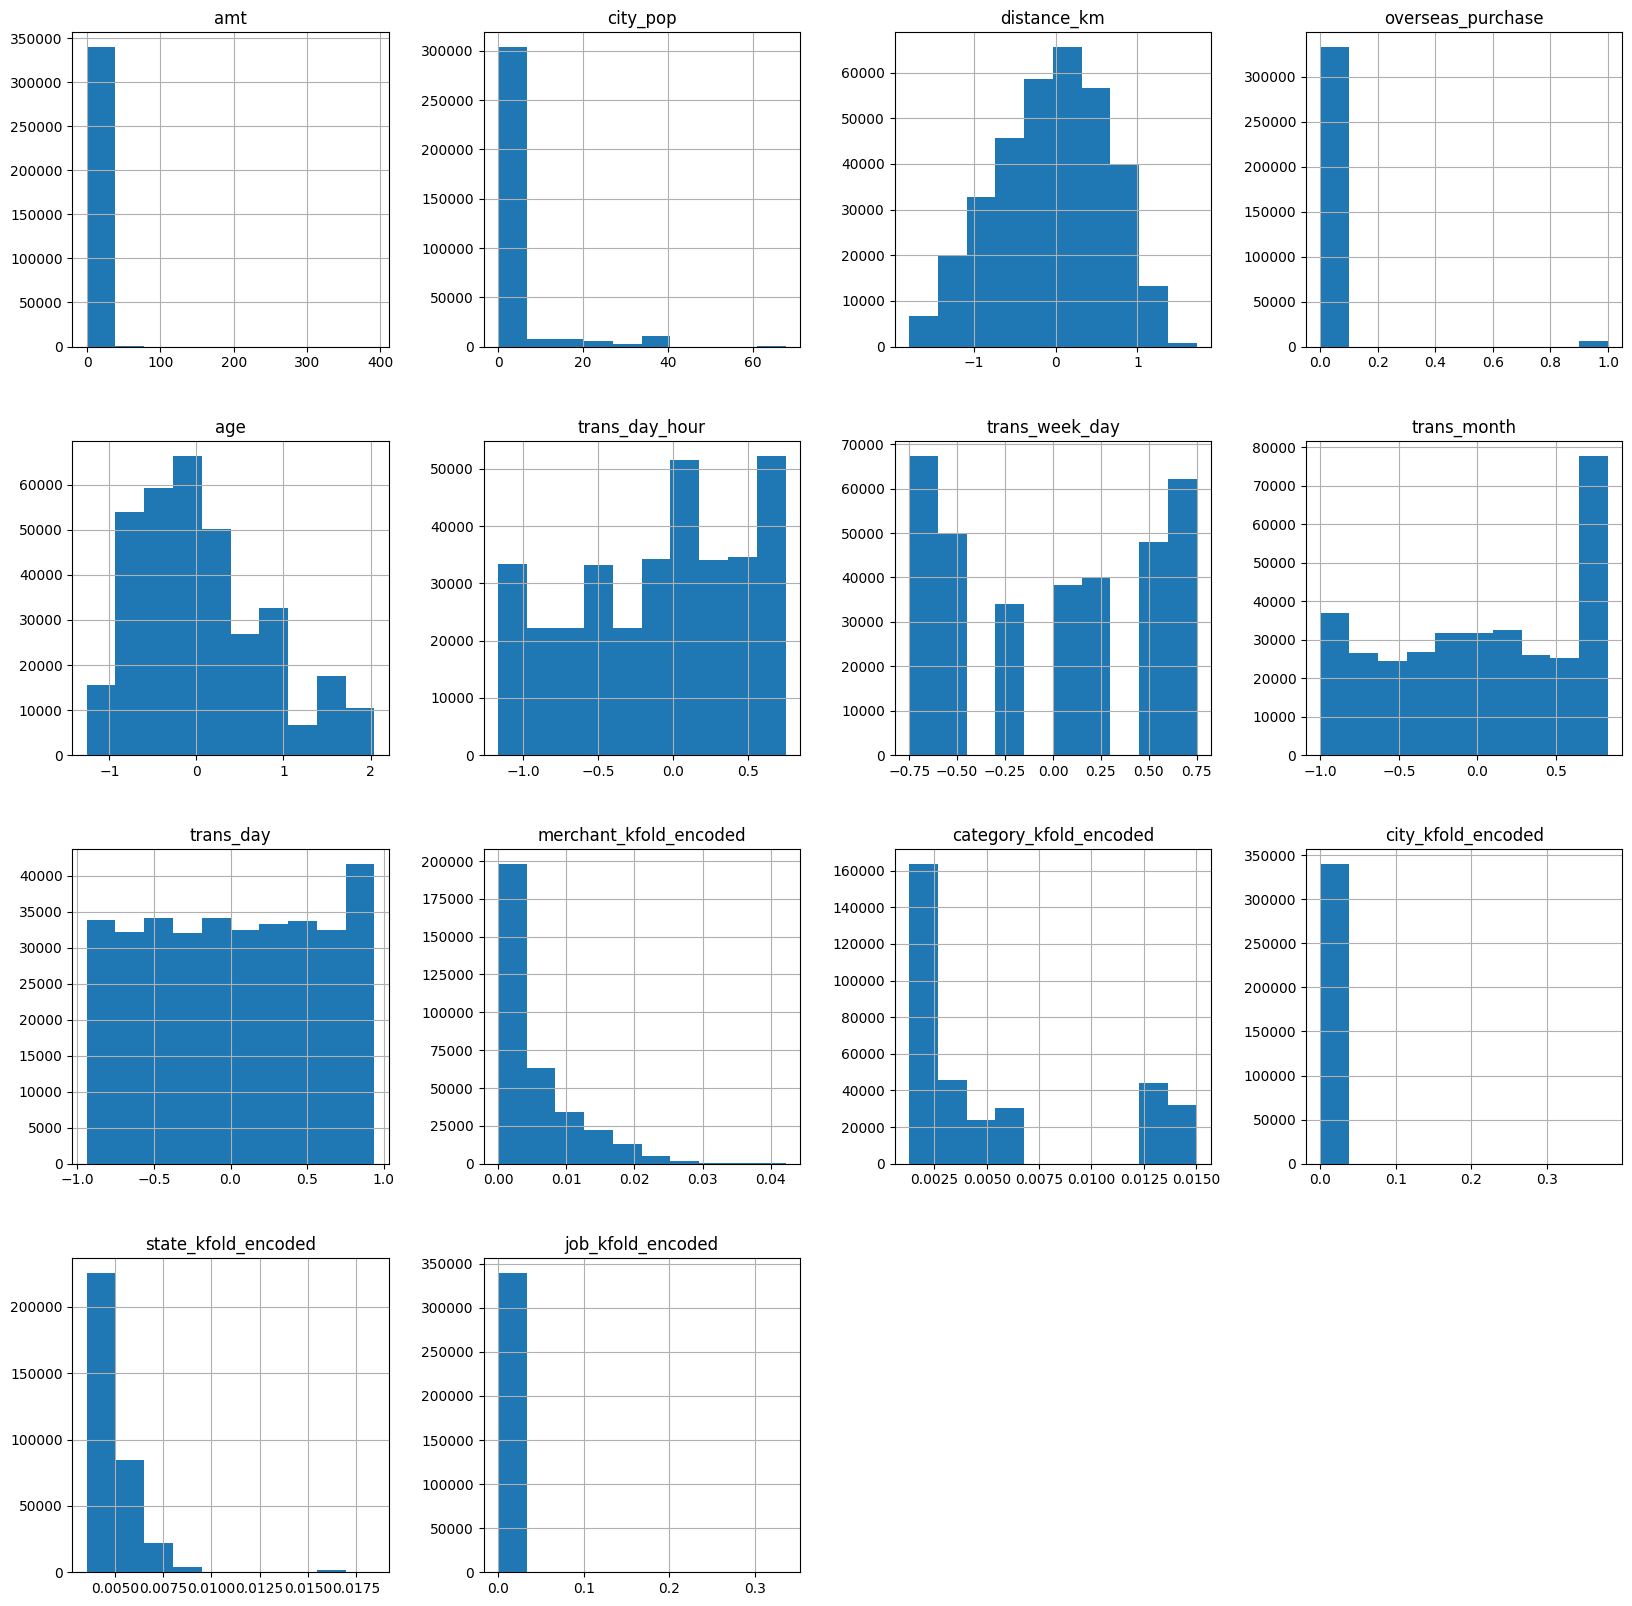

In [ ]:
X_all_encoded = pd.concat([X_train_encoded, X_test_encoded], axis=0).reset_index(drop=True)
y_all = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

X_all_encoded.hist(figsize = (20, 20))
plt.show()

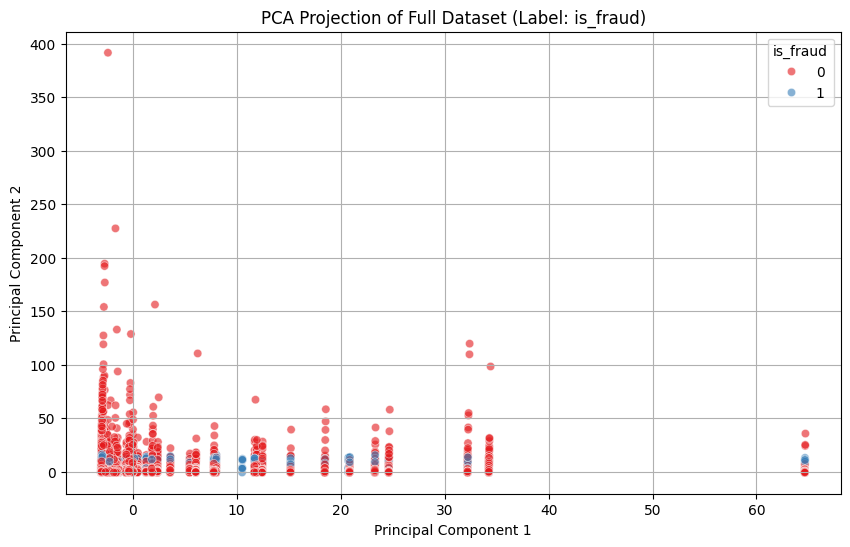

In [ ]:
##optional!!為了確認資料適不適合做SMOTE,所以做了PCA去分析
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_all_encoded)

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_all, palette='Set1', alpha=0.6)
# plt.title("PCA Projection of Full Dataset (Label: is_fraud)")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend(title='is_fraud')
# plt.grid(True)
# plt.show()

### ML

In [123]:
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, RocCurveDisplay, matthews_corrcoef, precision_score, precision_recall_curve
import time

In [49]:
scale_pos_weight=int(round((df['is_fraud'].value_counts()[0])/(df['is_fraud'].value_counts()[1]),0))
scale_pos_weight

190

In [57]:
def xgb_cv(learning_rate, max_depth, n_estimators, scale_pos_weight=190):
    model = XGBClassifier(learning_rate = learning_rate,
                                max_depth = int(round(max_depth)),
                                n_estimators = int(round(n_estimators)),
                                scale_pos_weight = scale_pos_weight
                          )
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train_encoded, y_train, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params={'learning_rate': (0.001, 0.5),
           'max_depth': (3, 10),
           'n_estimators': (50, 100)
          }

xgbBO = BayesianOptimization(xgb_cv, params)

start = time.time()
xgbBO.maximize(init_points=4, n_iter = 8)

print('It takes %s minutes' % ((time.time() - start)/60))

params_xgb = xgbBO.max['params']
params_xgb['max_depth'] = round(params_xgb['max_depth'])
params_xgb['n_estimators'] = round(params_xgb['n_estimators'])
params_xgb['learning_rate'] = round((params_xgb['learning_rate']),4)
print(params_xgb)


|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | -0.008829 | 0.3664740 | 6.4215765 | 63.770247 |
| 2         | -0.010945 | 0.2882947 | 5.7904978 | 69.917231 |
| 3         | -0.006858 | 0.4479731 | 9.9302601 | 90.549778 |
| 4         | -0.269835 | 0.0187821 | 3.8083949 | 66.530214 |
| 5         | -0.005921 | 0.3871329 | 8.4418231 | 60.089519 |
| 6         | -0.005784 | 0.2737223 | 8.4603018 | 70.910571 |
| 7         | -0.006941 | 0.2810933 | 7.1571909 | 70.428730 |
| 8         | -0.006814 | 0.5       | 9.7399868 | 63.482207 |
| 9         | -0.009035 | 0.5       | 5.2878233 | 73.551821 |
| 10        | -0.011789 | 0.5       | 4.7524668 | 59.835518 |
| 11        | -0.628965 | 0.001     | 9.4084044 | 75.035787 |
| 12        | -0.006864 | 0.5       | 10.0      | 67.697786 |
It takes 0.21641934712727864 minutes
{'learning_rate': 0.2737, 'max_depth': 8, 'n_estimators': 71}


In [58]:
def cat_cv(learning_rate, depth, iterations, scale_pos_weight=190):
    model = CatBoostClassifier(learning_rate = learning_rate,
                                depth = int(round(depth)), 
                                iterations = int(round(iterations)),
                                class_weights = {0:1, 1:scale_pos_weight},verbose=False
                                )
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train_encoded, y_train,verbose=False, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params={'learning_rate': (0.001, 0.5),
        'depth' : (6, 16),
        'iterations': (50, 200)
          }


catBO = BayesianOptimization(cat_cv, params)
start = time.time()
catBO.maximize(init_points=4, n_iter = 8)

print('It takes %s minutes' % ((time.time() - start)/60))

params_cat = catBO.max['params']
params_cat['depth'] = round(params_cat['depth'])
params_cat['iterations'] = round(params_cat['iterations'])
print(params_cat)

|   iter    |  target   | learni... |   depth   | iterat... |
-------------------------------------------------------------
| 1         | -0.022249 | 0.4178942 | 9.1551608 | 51.264905 |
| 2         | -0.164071 | 0.0191210 | 9.8681266 | 129.37458 |
| 3         | -0.012913 | 0.3332170 | 14.164220 | 57.404322 |
| 4         | -0.008974 | 0.4925641 | 15.357036 | 107.61325 |
| 5         | -0.010101 | 0.5       | 16.0      | 90.818429 |
| 6         | -0.009337 | 0.3388912 | 14.454615 | 199.90436 |
| 7         | -0.010254 | 0.2714190 | 15.111798 | 109.35063 |
| 8         | -0.010598 | 0.5       | 6.0       | 179.44772 |
| 9         | -0.646212 | 0.001     | 6.0       | 74.751287 |
| 10        | -0.588195 | 0.001     | 16.0      | 165.27857 |
| 11        | -0.583069 | 0.001     | 6.0       | 191.37668 |
| 12        | -0.626850 | 0.001     | 10.887386 | 98.127153 |
It takes 17.004394459724427 minutes
{'learning_rate': 0.49256413308159025, 'depth': 15, 'iterations': 108}


In [71]:

clf1 = XGBClassifier(learning_rate = 0.2737,
                        max_depth = 8,
                        n_estimators = 71,
                        scale_pos_weight = scale_pos_weight)
clf2 = CatBoostClassifier(learning_rate = 0.4925,
                                depth = 15, 
                                iterations = 108,
                                class_weights = {0:1, 1:scale_pos_weight},verbose=False
                                )
lr = LogisticRegression(class_weight={0:1, 1:scale_pos_weight})

## Stacking Ensemble
sclf = StackingClassifier(
    estimators=[('xgb', clf1), ('cat', clf2)],
    final_estimator=lr,
    passthrough=False,  
    cv=5,
    n_jobs=-1
)

### single_model_XGB

In [ ]:
clf1.fit(X_train_encoded, y_train)


y_pred1 = clf1.predict(X_test_encoded)
y_prob1 = clf1.predict_proba(X_test_encoded)[:, 1]


print("ROC-AUC Score:", roc_auc_score(y_test, y_prob1))
print("Precision Score:", precision_score(y_test, y_pred1))
print("Recall Score:", recall_score(y_test, y_pred1))
print("F1 Score:", f1_score(y_test, y_pred1))
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("MCC (Matthews Correlation Coefficient):", matthews_corrcoef(y_test, y_pred1))

print("\nClassification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))



ROC-AUC Score: 0.9938996393705097
Recall Score: 0.7584269662921348
F1 Score: 0.709592641261498
Accuracy: 0.9967462677777451
MCC (Matthews Correlation Coefficient): 0.7094522131965063

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     67566
           1       0.67      0.76      0.71       356

    accuracy                           1.00     67922
   macro avg       0.83      0.88      0.85     67922
weighted avg       1.00      1.00      1.00     67922

Confusion Matrix:
 [[67431   135]
 [   86   270]]


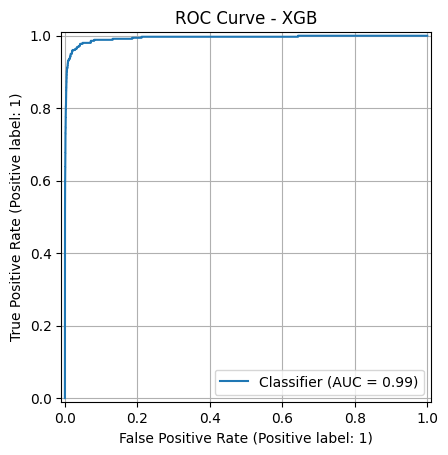

In [116]:
RocCurveDisplay.from_predictions(y_test, y_prob1)
plt.title("ROC Curve - XGB")
plt.grid(True)
plt.show()

### single_model_Cat

In [ ]:
clf2.fit(X_train_encoded, y_train)


y_pred2 = clf2.predict(X_test_encoded)
y_prob2 = clf2.predict_proba(X_test_encoded)[:, 1]


print("ROC-AUC Score:", roc_auc_score(y_test, y_prob2))
print("Precision Score:", precision_score(y_test, y_pred2))
print("Recall Score:", recall_score(y_test, y_pred2))
print("F1 Score:", f1_score(y_test, y_pred2))
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("MCC (Matthews Correlation Coefficient):", matthews_corrcoef(y_test, y_pred2))

print("\nClassification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

ROC-AUC Score: 0.99153100239566
Recall Score: 0.7893258426966292
F1 Score: 0.7553763440860215
Accuracy: 0.9973204558169665
MCC (Matthews Correlation Coefficient): 0.7547378298652256

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     67566
           1       0.72      0.79      0.76       356

    accuracy                           1.00     67922
   macro avg       0.86      0.89      0.88     67922
weighted avg       1.00      1.00      1.00     67922

Confusion Matrix:
 [[67459   107]
 [   75   281]]


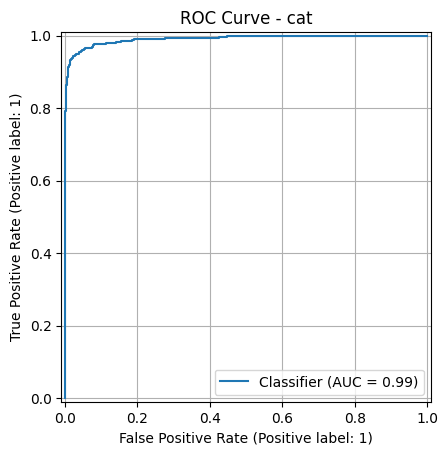

In [115]:
RocCurveDisplay.from_predictions(y_test, y_prob2)
plt.title("ROC Curve - cat")
plt.grid(True)
plt.show()

### XGB+Cat+Logistic

In [119]:
sclf.fit(X_train_encoded, y_train)

y_pred = sclf.predict(X_test_encoded)
y_prob = sclf.predict_proba(X_test_encoded)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("MCC (Matthews Correlation Coefficient):", matthews_corrcoef(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ROC-AUC Score: 0.9944511600309577
Precision Score: 0.42670157068062825
Recall Score: 0.9157303370786517
F1 Score: 0.5821428571428572
Accuracy: 0.9931097435293424
MCC (Matthews Correlation Coefficient): 0.6225522393102564

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     67566
           1       0.43      0.92      0.58       356

    accuracy                           0.99     67922
   macro avg       0.71      0.95      0.79     67922
weighted avg       1.00      0.99      0.99     67922

Confusion Matrix:
 [[67128   438]
 [   30   326]]


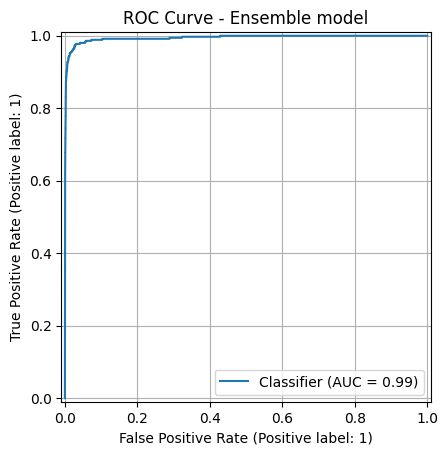

In [117]:
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - Ensemble model")
plt.grid(True)
plt.show()

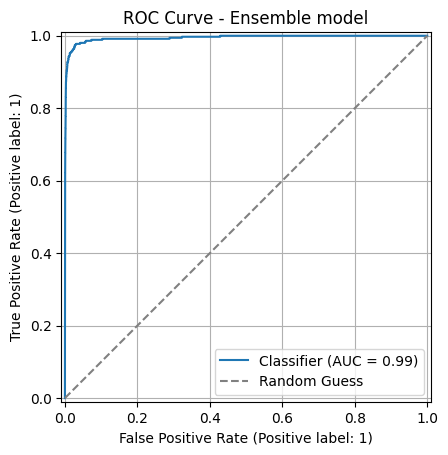

In [ ]:
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess') 
plt.title("ROC Curve - Ensemble model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

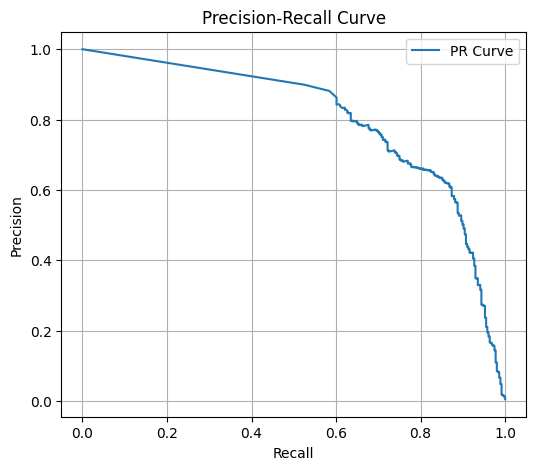

In [124]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

### SHAP

In [75]:
import shap

In [89]:
##因為沒有直接對ensemble model做Shap value計算的模組,經github上潛水各個討論確實看到有人提出用平均去計算shap value
explaner1=shap.Explainer(clf1)
shap_value1=explaner1(X_train_encoded)


In [90]:
explaner2=shap.Explainer(clf2)
shap_value2=explaner2(X_train_encoded)

In [103]:
w1 = 0.5
w2 = 0.5

# 確保 shap1 和 shap2 的 shape 相同
assert shap_value1.values.shape == shap_value2.values.shape

# 加權平均 values、base_values、data
combined_values = w1 * shap_value1.values + w2 * shap_value2.values
combined_base_values = w1 * shap_value1.base_values + w2 * shap_value2.base_values
combined_data = w1 * shap_value1.data + w2 * shap_value2.data

# 建立新的 shap.Explanation
combined_shap_value = shap.Explanation(
    values=combined_values,
    base_values=combined_base_values,
    data=combined_data,
    feature_names=shap_value1.feature_names
)

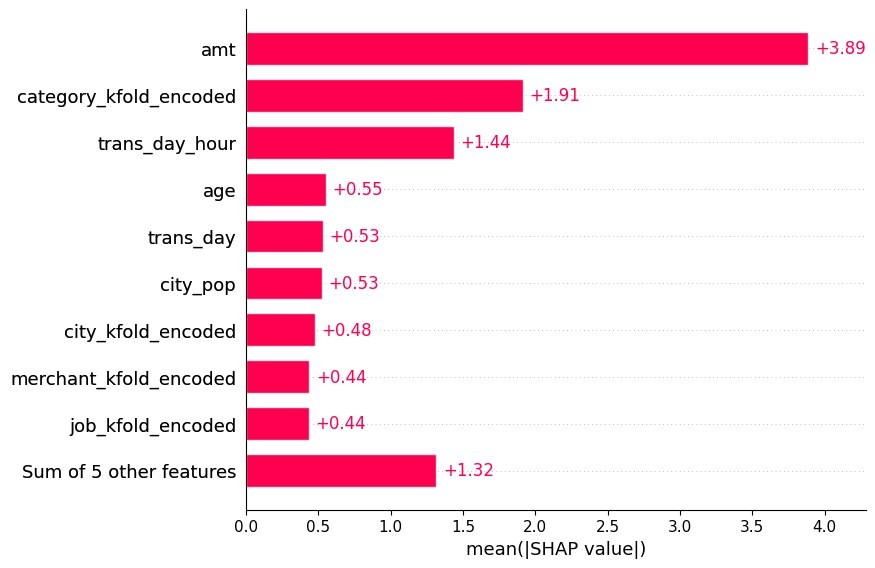

In [97]:
shap.plots.bar(shap_value1)

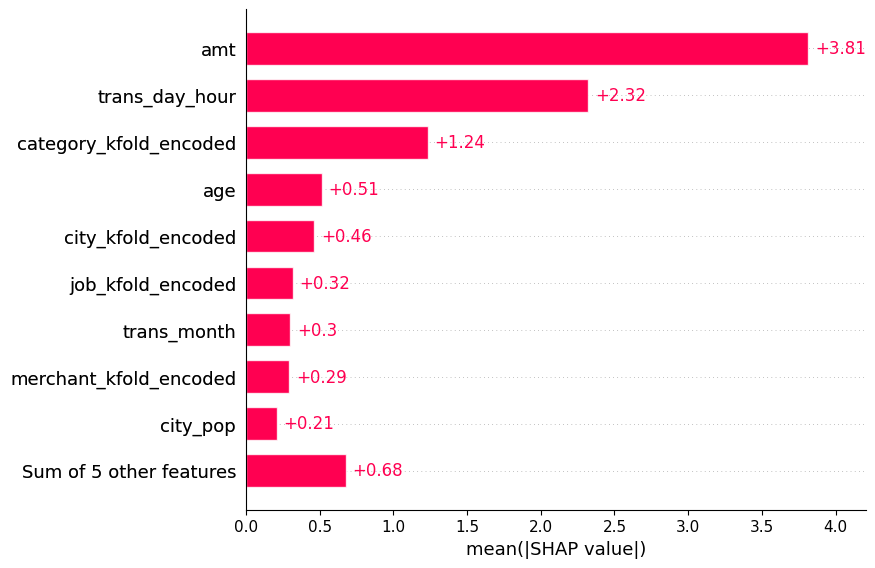

In [98]:
shap.plots.bar(shap_value2)

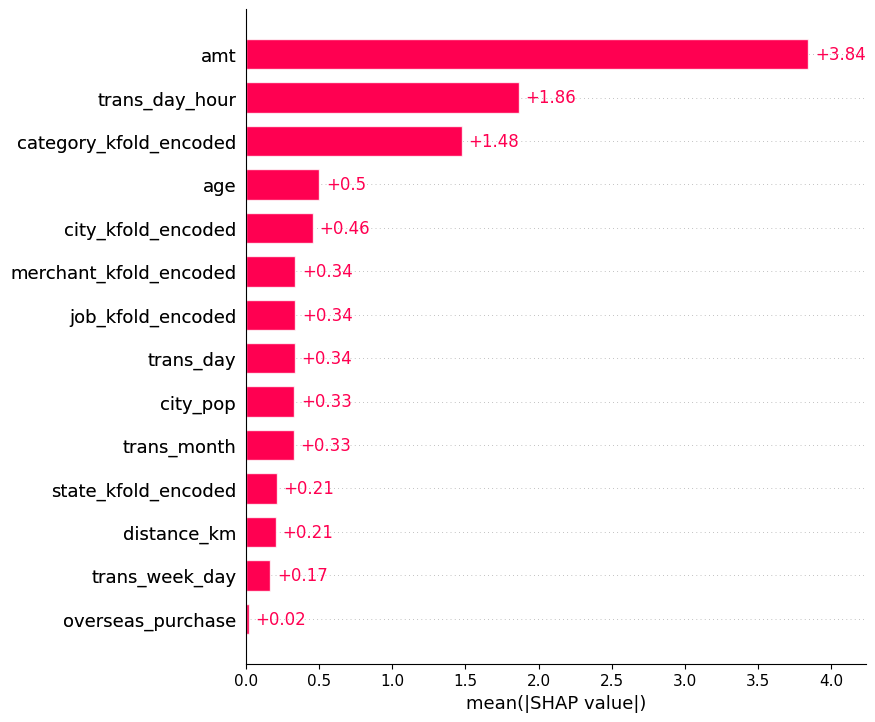

In [112]:
shap.plots.bar(combined_shap_value,max_display=14)

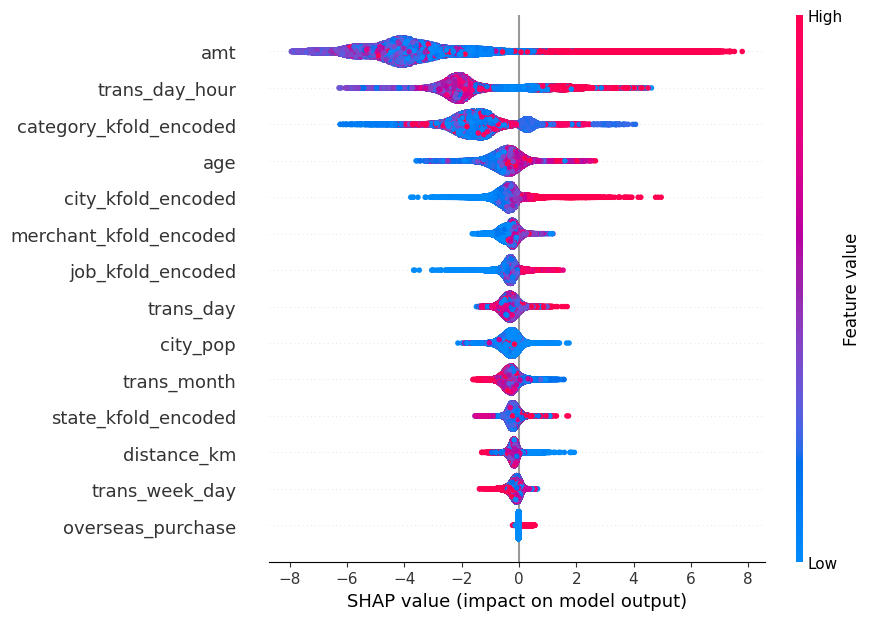

In [109]:
shap.plots.beeswarm(combined_shap_value,max_display=14)

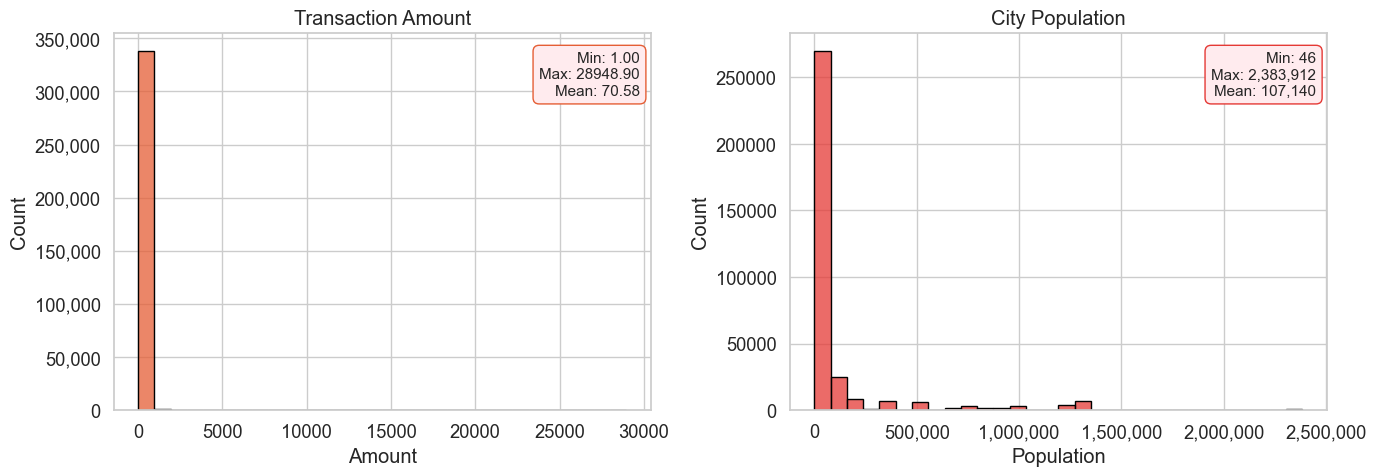

In [ ]:
import matplotlib.ticker as ticker

sns.set(style="whitegrid", palette="deep", font_scale=1.2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# amt 圖
sns.histplot(df['amt'], bins=30,  ax=axes[0], color="#E55E35", edgecolor='black')
axes[0].set_title("Transaction Amount")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Count")
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # y 軸數字格式化（加逗號）

amt_min = df['amt'].min()
amt_max = df['amt'].max()
amt_mean = df['amt'].mean()
summary_text_amt = f"Min: {amt_min:.2f}\nMax: {amt_max:.2f}\nMean: {amt_mean:.2f}"
axes[0].text(
    0.98, 0.95, summary_text_amt,
    transform=axes[0].transAxes,  # 相對座標 (1=右邊, 0=左邊)
    fontsize=11,
    va='top', ha='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="#FFEBEE", edgecolor="#E55E35")
)

# city_pop 圖
sns.histplot(df['city_pop'], bins=30,  ax=axes[1], color="#E53935", edgecolor='black')
axes[1].set_title("City Population")
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Count")
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # x 軸數字格式化

pop_min = df['city_pop'].min()
pop_max = df['city_pop'].max()
pop_mean = df['city_pop'].mean()
summary_text_pop = f"Min: {int(pop_min):,}\nMax: {int(pop_max):,}\nMean: {int(pop_mean):,}"
axes[1].text(
    0.98, 0.95, summary_text_pop,
    transform=axes[1].transAxes,
    fontsize=11,
    va='top', ha='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="#FFEBEE", edgecolor="#E53935")
)

plt.tight_layout()
plt.show()